In [115]:
import numpy as np
import time
import  numpy as np
import matplotlib.pyplot as plt


In [116]:
def gen_random_conf(n):
    #input: n = length of array = width of array
    #output: random 10x10 array (-1/2's and +1/2's)
    
    A = np.random.choice([-0.5,0.5], size=(n,n))
    
    return(A)

In [117]:
#Compute energy as a function of J (i.e. assume J = 1)
# This is inefficient but I think easier to understand 
# Loop over all spins
def calculate_energy(N, spin):
        
    energy = 0
    #get_ising_plot_1(array = spin);
    
    for i in range(N):  # 0, N-1
      for j in range(N): # 0, N-1
        # calculate four interactions
        for delta_i in range(-1,2,2):  # -1 and 1
          ii = i + delta_i
          if (ii < 0): 
            ii = ii + N
          if (ii >=N): 
            ii = ii - N
          energy = energy - spin[i,j]*spin[ii, j] #spin--> array name
        
        for delta_j in range(-1,2,2):  # -1 and 1
          jj = j + delta_j
          if (jj < 0): 
            jj = jj + N
          if (jj >=N): 
            jj = jj - N
          energy = energy - spin[i,j]*spin[i, jj] 
        
        energy = energy * 0.5
    

    return energy

In [118]:
def magnetism_sum(spin):
    magnetism = np.sum(spin)
    return magnetism

In [119]:
def metropolis(N, spin):
    k = 8.617E-5 #boltzman constant (eV/K)
    T = 300 #K
    
    
    original_energy = calculate_energy(10, spin)
    
    #get_ising_plot_1(spin);
    
    new_energy = 0
    

    a = np.random.randint(0, N) 
    b = np.random.randint(0, N)
    random =  spin[a, b]

        #recalculate energy a
    for delta_a in range(-1,2,2):  # -1 and 1
        aa = a + delta_a
        if (a < 0): 
            aa = aa + N
        if (aa >=N): 
            aa = aa - N
        new_energy = new_energy - spin[a,b]*spin[aa, b] #spin--> array name

    for delta_b in range(-1,2,2):  # -1 and 1
        bb = b + delta_b
        if (bb < 0): 
            bb = bb + N
        if (bb >=N): 
            bb = bb - N
    new_energy = new_energy - spin[a,b]*spin[a, bb] 

    new_energy = new_energy * 0.5

    if new_energy < original_energy:
        original_energy = new_energy
        random *= -1
    #if new system has higher energy, spin accepted with given probability 
    #elif np.rand() < np.exp(-new_energy*k*T):
        #random *= -1
    spin[a, b] = random

    #get_ising_plot_1(spin);

    return spin

In [120]:
def get_ising_plot_1(array = [[1/2,-1/2],[-1/2,1/2]]):
    # input: an NxN array corresponding to spins in an Ising model
    # output: a visual representation of the array (matplotlib figure)

    # Verify input is a square numpy array
    ising_array = np.array(array)
    if ising_array.shape[0] != ising_array.shape[1]:
        print("Currently this code only supports square arrays, sorry!")
        return

    # Create the figure
    f = plt.figure()
    nx = range(ising_array.shape[0])
    ny = range(ising_array.shape[1])
    X, Y = np.meshgrid(nx,ny)
    plt.pcolormesh(X, Y, ising_array, cmap=plt.cm.Greys);

    # Format the figure
    frame = plt.gca()
    frame.set_aspect('equal')
    frame.axes.xaxis.set_visible(False)
    frame.axes.yaxis.set_visible(False)
    f.set_dpi(180)

    #plt.show()

    return f


In [127]:
def iteration_time(it): 
    start_time_tot = time.time()
    for i in range(it):
        spin = gen_random_conf(10)
        start_time_it = time.time()
        metropolis(10, spin)
        end_time_it = time.time()

        print("Iteration " + str(i) + ": " + str(end_time_it - start_time_it))

    end_time_tot = time.time();   
    print("It took " + str(end_time_tot-start_time_tot) + " seconds total to run " + str(it) + " iterations.")

iteration_time(100)


Iteration 0: 0.0003609657287597656
Iteration 1: 0.00035762786865234375
Iteration 2: 0.0003604888916015625
Iteration 3: 0.0003857612609863281
Iteration 4: 0.0003540515899658203
Iteration 5: 0.00036334991455078125
Iteration 6: 0.00035572052001953125
Iteration 7: 0.00035381317138671875
Iteration 8: 0.00034737586975097656
Iteration 9: 0.00036263465881347656
Iteration 10: 0.00034618377685546875
Iteration 11: 0.000362396240234375
Iteration 12: 0.0003681182861328125
Iteration 13: 0.00036907196044921875
Iteration 14: 0.0003540515899658203
Iteration 15: 0.000362396240234375
Iteration 16: 0.0003478527069091797
Iteration 17: 0.0003476142883300781
Iteration 18: 0.00034809112548828125
Iteration 19: 0.0003597736358642578
Iteration 20: 0.0003466606140136719
Iteration 21: 0.00035071372985839844
Iteration 22: 0.0003497600555419922
Iteration 23: 0.0003497600555419922
Iteration 24: 0.0003483295440673828
Iteration 25: 0.00035643577575683594
Iteration 26: 0.00034809112548828125
Iteration 27: 0.000351905822

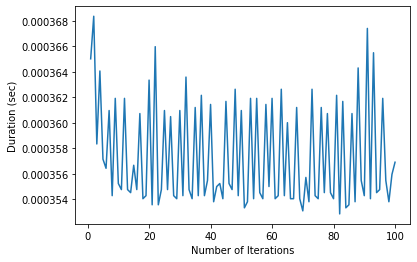

In [128]:
plt.ylabel("Duration (sec)")
plt.xlabel("Number of Iterations")
duration_array = []
iteration_array = []
for i in range(100):
    duration_array.append(time_it())
    iteration_array.append(i+1)


#print(duration_array)
#print(iteration_array)
plt.plot(iteration_array, duration_array)


In [129]:
import plotly.graph_objects as go

# Generate a plotly image from an array of spins 0.5 and -0.5 (Kat)
def get_ising_plot(spin):
    img = np.array(spin, dtype = object)
    for i in range(len(spin[0])):
        for j in range(len(spin[1])):
            if spin[i,j] == 0.5:
                img[i,j] = [255,255,255]
            else:
                img[i,j] = [0,0,0]
    image = go.Image(z=img)
    return image

# Stich together plotly frames to create an animation (Kat)
def get_ising_video(frames, spin):
    fig = go.Figure(
    data=[get_ising_plot(spin)], # TODO: starting image is the last image, fix
    layout=go.Layout(
        title = "Ising model demonstration",
        xaxis = {'showticklabels':False},
        yaxis = {'showticklabels':False},
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, dict(frame=dict(duration=20))])])]
        ), frames=frames )

    return fig                         

In [130]:
# Test Ava's Metropolis algorithm with video of Ising plot
N = 10 # size of Ising array
n = 300 # number of Metropolis iterations
spin = gen_random_conf(N) # initial Ising array
frames = []
for i in range(n):    
    frame = go.Frame(data = get_ising_plot(spin))
    spin = metropolis(N,spin)
    frames.append(frame)

fig = get_ising_video(frames, spin)
fig.show()